In [6]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [9]:
cancer='BLCA'
cancer1='blca'

In [29]:
features=pd.read_csv('/home/wbjeong/cancer/JJM/metadata/'+cancer+'_omics.csv')
raw_value=pd.read_csv('/home/wbjeong/cancer/JJM/code/datasets_csv_mutsig/tcga_'+cancer1+'_all_clean.csv.zip')
for i in range(0,5):
    print(i)
    samples=pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/'+str(i)+'.csv')
    s=np.load('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/'+cancer+str(i)+'.npy')
    df=pd.DataFrame(s)
    df.columns=features.columns[1:]
    df.index=samples.iloc[:,1]
    print(samples)
    if i==0:
        df1=df
    else:
        df1=pd.concat([df1,df],axis=0)
raw_value.index=raw_value['case_id']
raw_value=raw_value.drop_duplicates('case_id')
raw_value=raw_value.loc[df1.index,:]

0
    Unnamed: 0             0
0            0  TCGA-2F-A9KO
1            1  TCGA-2F-A9KQ
2            2  TCGA-2F-A9KR
3            3  TCGA-4Z-AA80
4            4  TCGA-4Z-AA86
..         ...           ...
70          70  TCGA-ZF-A9R4
71          71  TCGA-ZF-A9R7
72          72  TCGA-ZF-A9R9
73          73  TCGA-ZF-A9RC
74          74  TCGA-ZF-A9RD

[75 rows x 2 columns]
1
    Unnamed: 0             0
0            0  TCGA-2F-A9KP
1            1  TCGA-4Z-AA7M
2            2  TCGA-4Z-AA7Q
3            3  TCGA-4Z-AA7R
4            4  TCGA-4Z-AA7W
..         ...           ...
70          70  TCGA-ZF-A9R3
71          71  TCGA-ZF-AA4R
72          72  TCGA-ZF-AA4U
73          73  TCGA-ZF-AA4V
74          74  TCGA-ZF-AA4X

[75 rows x 2 columns]
2
    Unnamed: 0             0
0            0  TCGA-4Z-AA7N
1            1  TCGA-4Z-AA7Y
2            2  TCGA-4Z-AA87
3            3  TCGA-BT-A20N
4            4  TCGA-BT-A20P
..         ...           ...
70          70  TCGA-ZF-A9RM
71          71  TCGA

In [30]:
filtered_columns = [col for col in df.columns if col.endswith('_rnaseq')]
raw_value=raw_value.loc[:,filtered_columns]
df1=df1.loc[:,filtered_columns]

In [10]:
df_abs.loc[:,'GCG_rnaseq'].max()

NameError: name 'df_abs' is not defined

In [31]:
df_abs=abs(df1)

In [32]:
df2=df_abs.mean()
df2=df2.sort_values(ascending=False)
df2.index[:7]

Index(['AMELX_rnaseq', 'IL25_rnaseq', 'PPY_rnaseq', 'EIF2AK4_rnaseq',
       'BCKDK_rnaseq', 'CIC_rnaseq', 'UTS2_rnaseq'],
      dtype='object')

In [13]:
df2.index[:10]

Index(['TTN_mut', 'VHL_mut', 'ADAMTS2_cnv', 'NEUROG1_cnv', 'RN7SKP150_cnv',
       'HTR4_cnv', 'YTHDC2_cnv', 'TNIP1_cnv', 'PCDHGB1_cnv', 'RNF44_cnv'],
      dtype='object')

In [ ]:
['BCKDK_rnaseq','CIC_rnaseq','EIF2AK4_rnaseq','DICER1_rnaseq','MECOM_rnaseq','PRNP_rnaseq','SRPK2_rnaseq']

In [33]:
features = np.array(raw_value.loc[:,['BCKDK_rnaseq','CIC_rnaseq','EIF2AK4_rnaseq','DICER1_rnaseq','MECOM_rnaseq','PRNP_rnaseq','SRPK2_rnaseq']])
shap_values = np.array(df1.loc[:,['BCKDK_rnaseq','CIC_rnaseq','EIF2AK4_rnaseq','DICER1_rnaseq','MECOM_rnaseq','PRNP_rnaseq','SRPK2_rnaseq']])
explanation = shap.Explanation(values=shap_values, data=features)


In [17]:
features = np.array(raw_value.loc[:,['TTN_mut','FLG_mut','NOTCH2_cnv','E2F3_cnv','LINC00709_cnv','HDGFL1_cnv','TP53_mut']])
shap_values = np.array(df1.loc[:,['TTN_mut','FLG_mut','NOTCH2_cnv','E2F3_cnv','LINC00709_cnv','HDGFL1_cnv','TP53_mut']])
explanation = shap.Explanation(values=shap_values, data=features)


In [20]:
features = np.array(raw_value.loc[:,:])
shap_values = np.array(df1.loc[:,])
explanation = shap.Explanation(values=shap_values, data=features)


In [23]:
shap_values

array([[ 0.22778783,  0.21339189,  0.09339799, ..., -0.02417942,
         0.04076725,  1.04890335],
       [-0.20973576, -0.21635392, -0.10732456, ..., -0.02016607,
         0.04281522, -0.11807136],
       [-0.20190781, -0.23263545, -0.10516787, ..., -0.02255962,
         0.04316976, -0.12817992],
       ...,
       [ 0.19927841,  0.16060296,  0.09974367, ..., -0.01991776,
         0.07899778, -0.04965722],
       [-0.12465201, -0.10728538, -0.09518748, ..., -0.03196714,
         0.03673285,  0.16466691],
       [ 0.16470466,  0.12972543,  0.09518681, ..., -0.01324081,
         0.06364343, -0.03645924]])

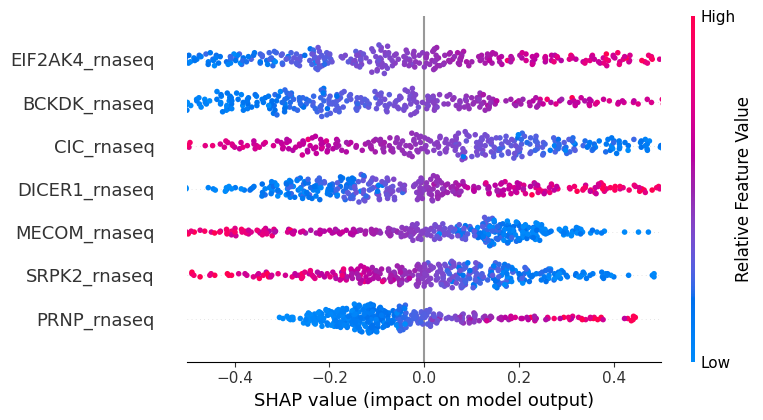

In [34]:
shap.summary_plot(explanation, feature_names=['BCKDK_rnaseq','CIC_rnaseq','EIF2AK4_rnaseq','DICER1_rnaseq','MECOM_rnaseq','PRNP_rnaseq','SRPK2_rnaseq'],max_display=7,show=False,color_bar_label='Relative Feature Value')
ax = plt.gca()
ax.set_xlim(-0.5, 0.5) 
#plt.show()
plt.savefig('/home/wbjeong/cancer/JJM/figures/'+cancer+'/SNN/global_RNA.pdf',bbox_inches='tight')

In [14]:
df2

TTN_mut          0.413711
E2F3_cnv         0.259476
LINC00709_cnv    0.248842
NOTCH2_cnv       0.227515
CREBBP_mut       0.213561
                   ...   
UHMK1_cnv        0.019775
MYOF_mut         0.019146
DSCAML1_mut      0.019092
DNAH8_mut        0.016701
EPHA2_mut        0.014911
Length: 627, dtype: float64

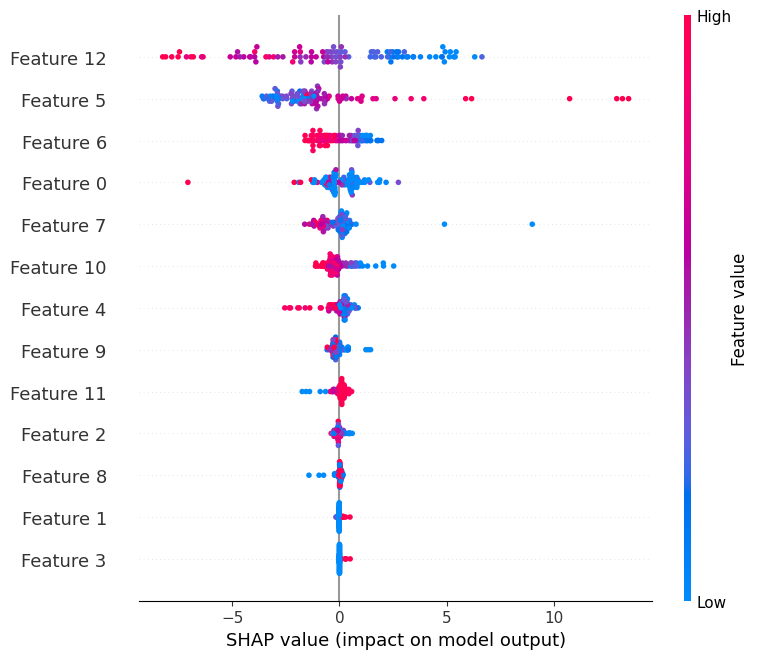

In [33]:
import shap
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
# 데이터 로드
#X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_test)

In [39]:
features = np.array(df)
shap_values = np.array(df)
explanation = shap.Explanation(values=shap_values, data=features)


In [66]:
df.iloc[ind,:]
# 열 이름이 '_rnaseq'로 끝나는 열만 필터링
filtered_columns = [col for col in df.columns if not col.endswith('_rnaseq')]
filtered_df = df[filtered_columns]
filtered_df=filtered_df.iloc[ind,:]
CNV=np.transpose(filtered_df)
CNV.columns=['Integrated Gradient Attribution']
CNV['abs_value']=abs(CNV['Integrated Gradient Attribution'])
CNV['raw']=list(raw_value.loc[:,CNV.index].iloc[0,:])
CNV=CNV.sort_values('abs_value',ascending=False)
CNV['Genes']=CNV.index


In [167]:
from shap.plots.colors._colors import red_blue, red_blue_circle, red_blue_no_bounds
red_blue1 = [red_blue(i / 5.) for i in range(5)]

In [168]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

NameError: name 'CNV' is not defined

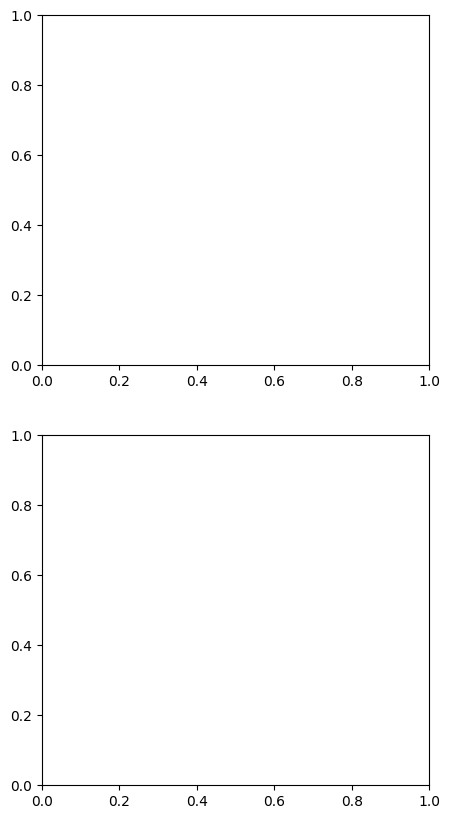

In [169]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))  # 1행 2열의 서브플롯

# 첫 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 1.) for i in range(10)]
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.iloc[:7,:], orient='h',ax=axes[0], palette=red_blue1)
axes[0].set_title('Molecular Explanation')
axes[0].set_xlim(-0.01, 0.01) 
norm = Normalize(vmin=CNV['raw'].min(), vmax=CNV['raw'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar=plt.colorbar(sm, ax=axes[0], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([CNV['raw'].min(),CNV['raw'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[0].legend().remove()
# 두 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 6.) for i in range(8)]
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=RNA.iloc[:7,:], orient='h',ax=axes[1],  palette=red_blue1)
axes[1].set_xlim(-0.01, 0.01) 
norm = Normalize(vmin=RNA['raw'].min(), vmax=RNA['raw'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar = plt.colorbar(sm, ax=axes[1], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([RNA['raw'].min(),RNA['raw'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[1].legend().remove()
plt.savefig('/home/wbjeong/cancer/JJM/figures/KIRC/SNN/'+sample+'.pdf',bbox_inches='tight')